# Solar Power Forecasting using Traditional and Hybrid Models

### Importing different Libraries 

In [85]:
# Importing different models and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,  
    median_absolute_error,
    max_error,
    r2_score,
    explained_variance_score
)

### Loading the Dataset that has been created and worked on

In [149]:
# Loading Dataset 
df = pd.read_csv('Charanka_Power_Output_Final.csv')

### Data Processing And Feature Engineering

In [150]:
# Preprocess the dataset

# Rename for datetime creation
df = df.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day', 'HR': 'hour'})
df['Datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('Datetime', inplace=True)

# Feature and target selection
features = ['ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_PAR_TOT', 'T2M', 'WS10M', 'WD10M']
target = 'Power_Output_kW'
X = df[features]
y = df[target]

Checking for missing values

In [151]:
#Checking for missing values
df.isnull().sum()

year                  0
month                 0
day                   0
hour                  0
ALLSKY_SFC_SW_DWN     0
ALLSKY_SFC_PAR_TOT    0
T2M                   0
WS10M                 0
WD10M                 0
Updated_T_C           0
Power_Output_kW       0
dtype: int64

In [152]:
# Display basic information and a preview of the dataset

df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_head, df_description

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22603 entries, 2022-01-01 00:00:00 to 2024-07-30 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                22603 non-null  int64  
 1   month               22603 non-null  int64  
 2   day                 22603 non-null  int64  
 3   hour                22603 non-null  int64  
 4   ALLSKY_SFC_SW_DWN   22603 non-null  float64
 5   ALLSKY_SFC_PAR_TOT  22603 non-null  float64
 6   T2M                 22603 non-null  float64
 7   WS10M               22603 non-null  float64
 8   WD10M               22603 non-null  float64
 9   Updated_T_C         22603 non-null  float64
 10  Power_Output_kW     22603 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 2.1 MB


(                     year  month  day  hour  ALLSKY_SFC_SW_DWN  \
 Datetime                                                         
 2022-01-01 00:00:00  2022      1    1     0                0.0   
 2022-01-01 01:00:00  2022      1    1     1                0.0   
 2022-01-01 02:00:00  2022      1    1     2                0.0   
 2022-01-01 03:00:00  2022      1    1     3                0.0   
 2022-01-01 04:00:00  2022      1    1     4                0.0   
 
                      ALLSKY_SFC_PAR_TOT    T2M  WS10M  WD10M  Updated_T_C  \
 Datetime                                                                    
 2022-01-01 00:00:00                 0.0  13.79   2.91   44.3        13.79   
 2022-01-01 01:00:00                 0.0  13.24   2.79   46.3        13.24   
 2022-01-01 02:00:00                 0.0  12.75   2.79   47.9        12.75   
 2022-01-01 03:00:00                 0.0  12.37   2.84   50.4        12.37   
 2022-01-01 04:00:00                 0.0  12.08   2.92   54.9

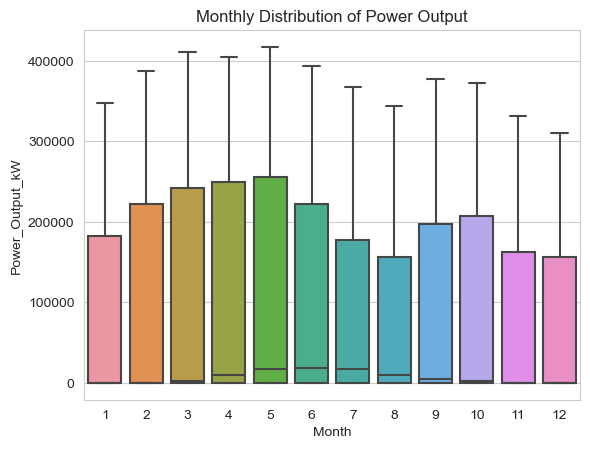

In [153]:
#Plotting Monthly Distribution Plot 
df["Month"] = df.index.month
sns.boxplot(x="Month", y="Power_Output_kW", data=df)
plt.title("Monthly Distribution of Power Output")
plt.show()

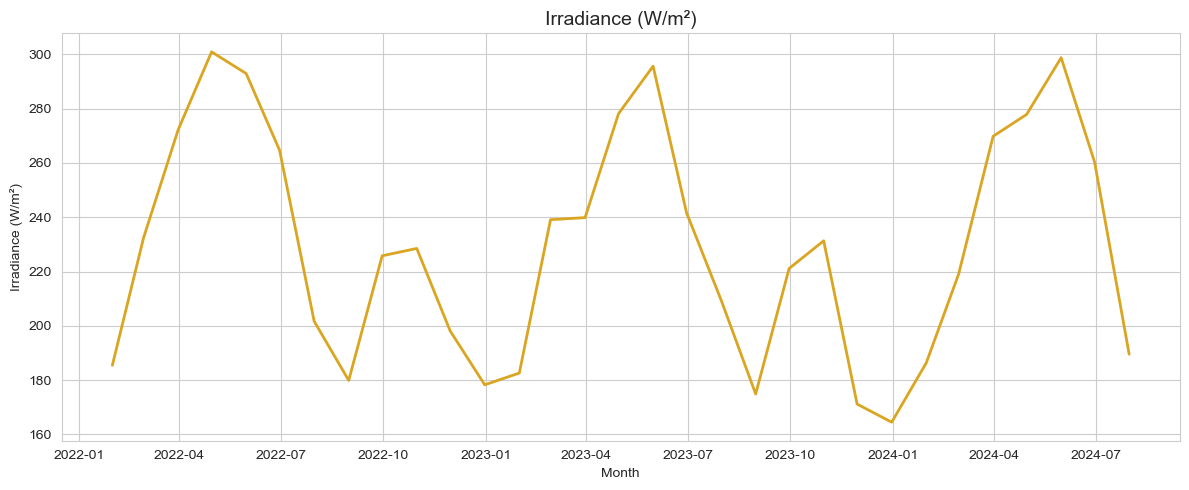

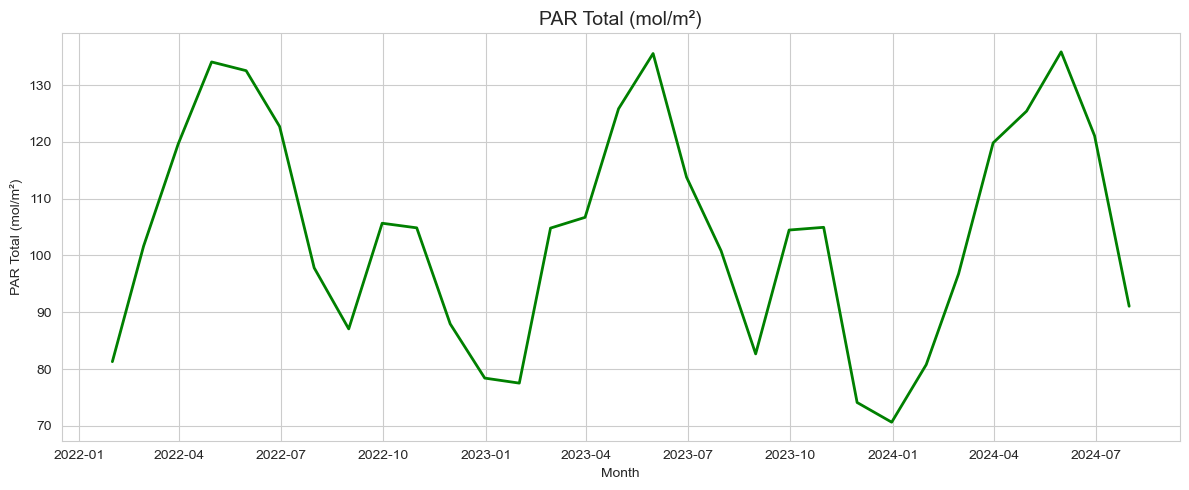

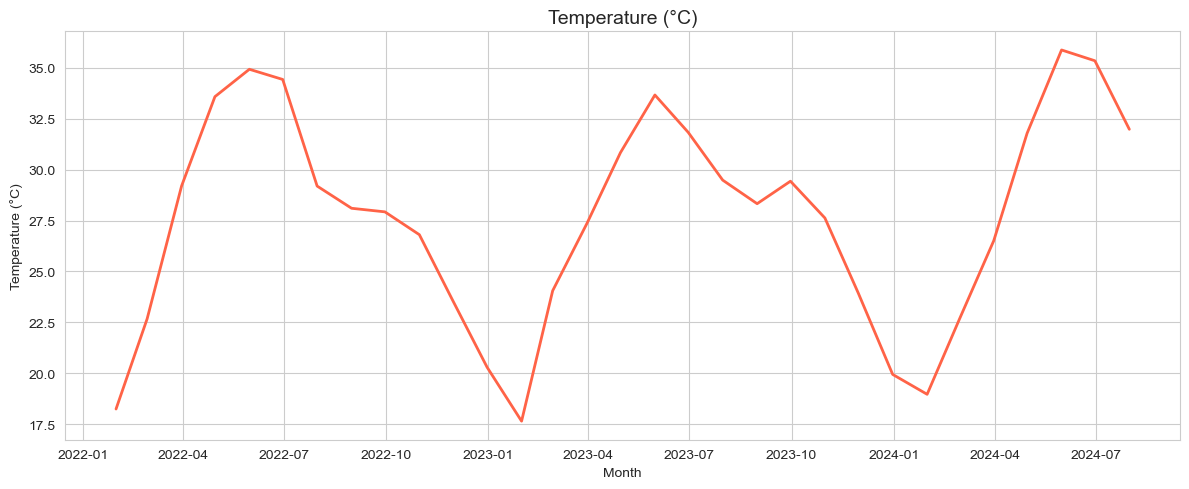

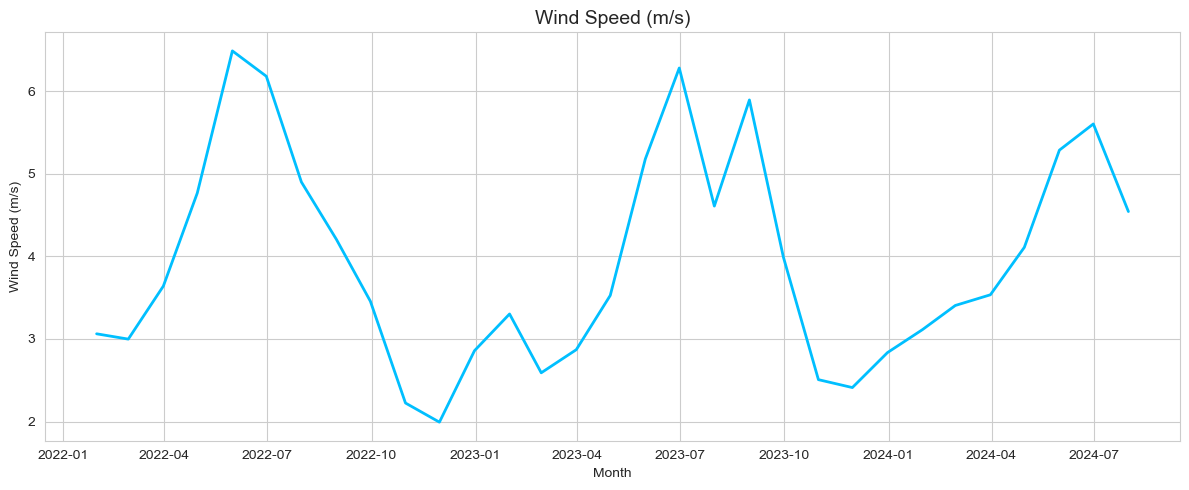

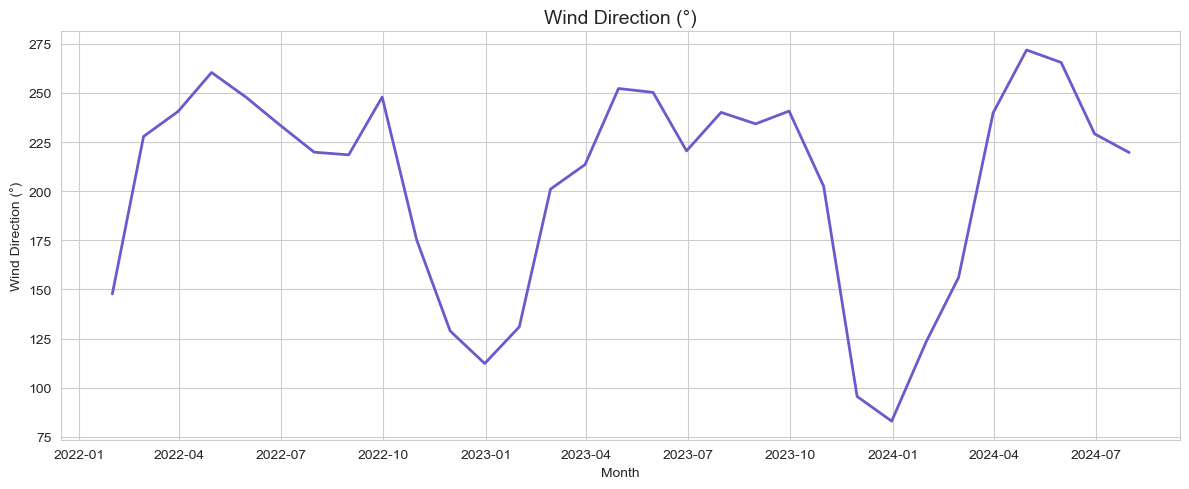

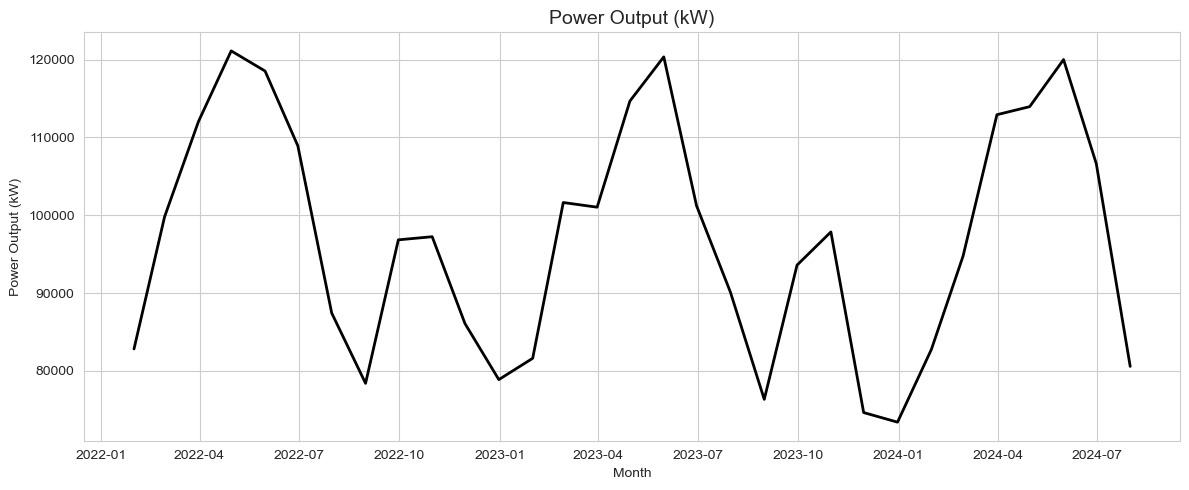

In [88]:
# Quarter Monthly Plots
features_to_plot = [
    'ALLSKY_SFC_SW_DWN',      # Irradiance
    'ALLSKY_SFC_PAR_TOT',     # PAR
    'T2M',                    # Temperature
    'WS10M',                  # Wind Speed
    'WD10M',                  # Wind Direction
    'Power_Output_kW'         # Output
]

# Compute monthly averages
monthly_df = df[features_to_plot].resample('M').mean()


# Plot settings
colors = ['goldenrod', 'green', 'tomato', 'deepskyblue', 'slateblue', 'black']
titles = [
    'Irradiance (W/m²)', 
    'PAR Total (mol/m²)', 
    'Temperature (°C)', 
    'Wind Speed (m/s)', 
    'Wind Direction (°)', 
    'Power Output (kW)'
]

# Generate individual plots
for feature, color, title in zip(features_to_plot, colors, titles):
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_df.index, monthly_df[feature], color=color, linewidth=2)
    plt.title(title, fontsize=14)
    plt.xlabel("Month")
    plt.ylabel(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

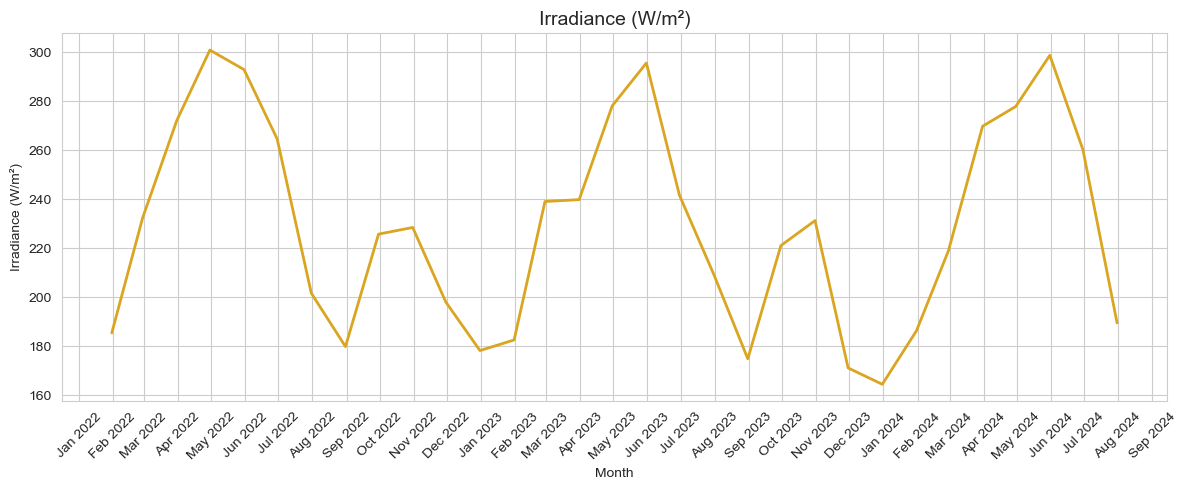

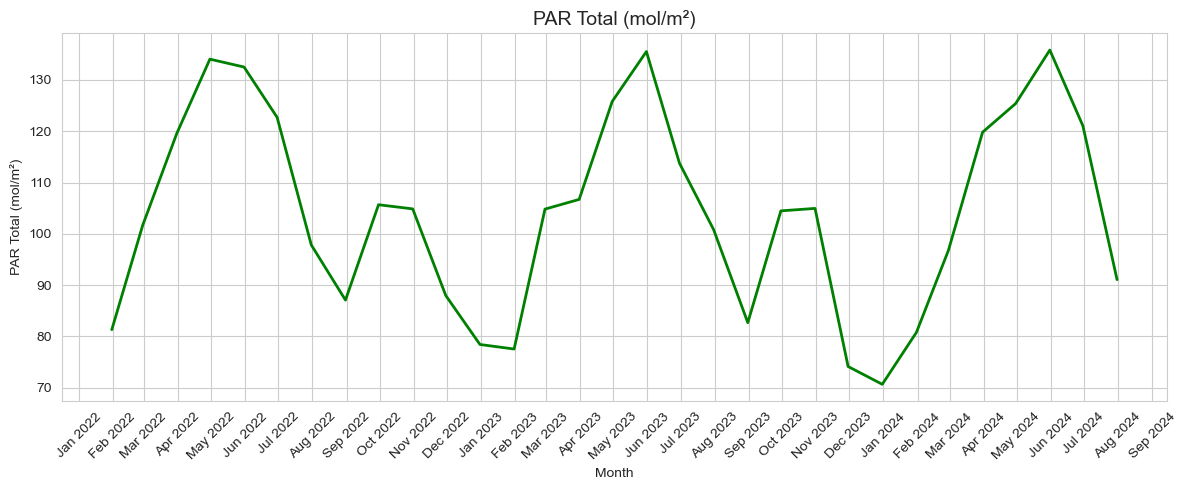

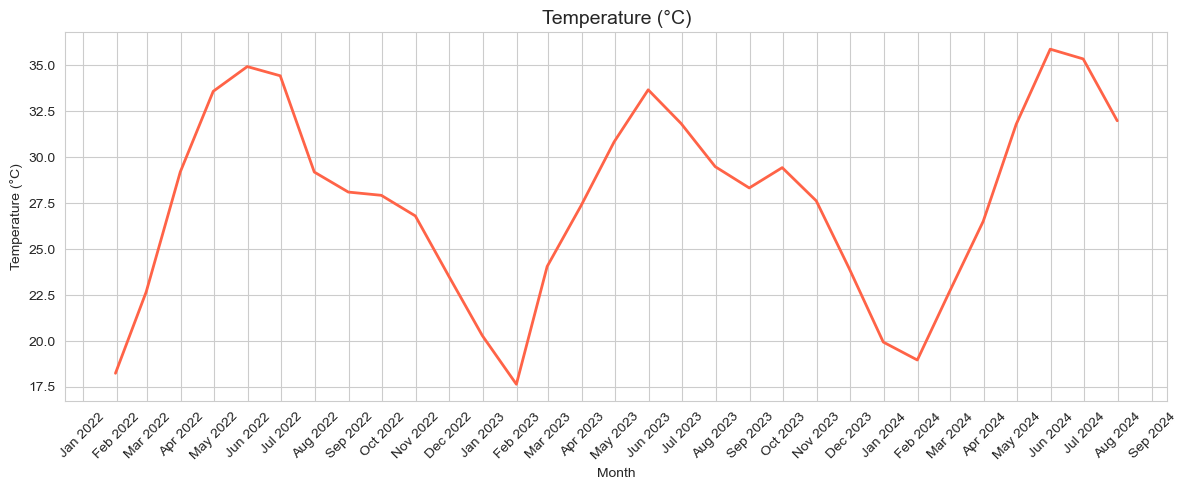

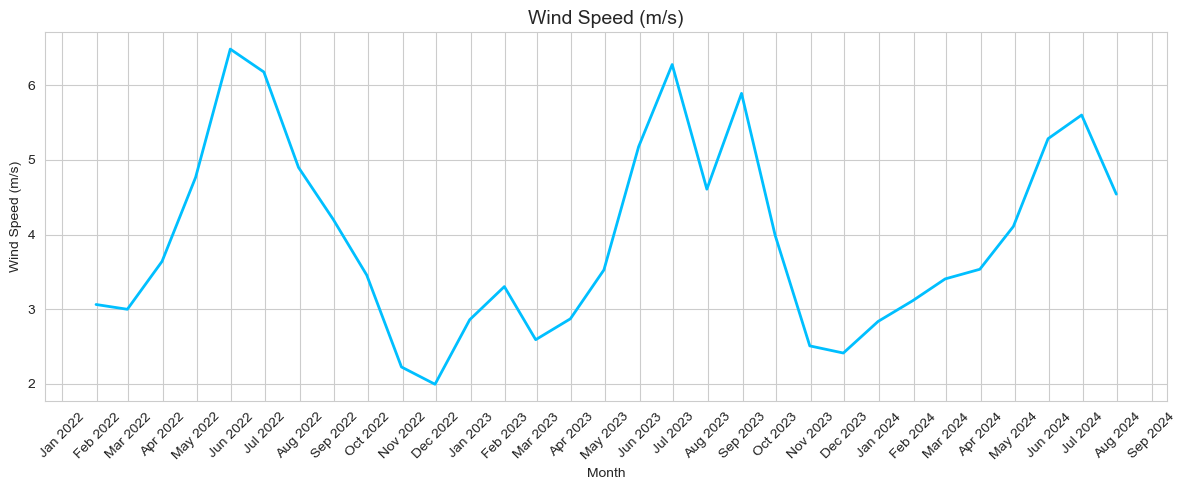

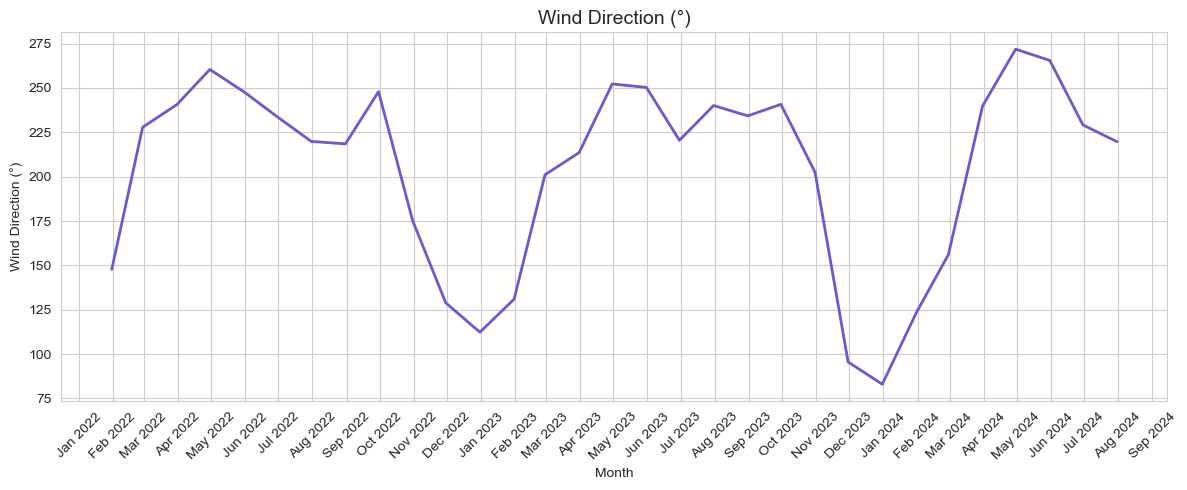

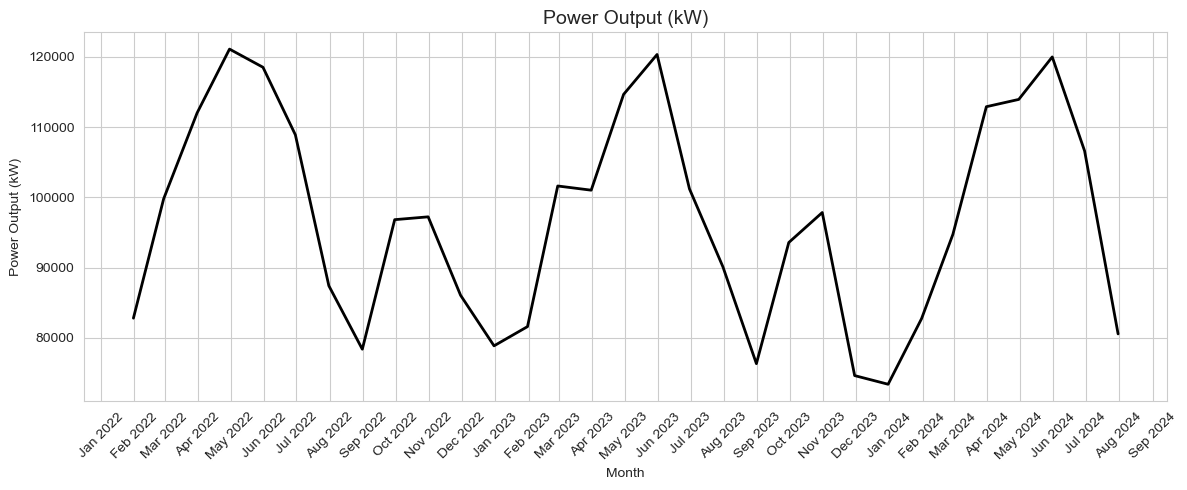

In [89]:
#Monthly Plots

import matplotlib.dates as mdates

for feature, color, title in zip(features_to_plot, colors, titles):
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_df.index, monthly_df[feature], color=color, linewidth=2)
    
    # Force x-axis ticks to show every month
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2022'
    
    plt.title(title, fontsize=14)
    plt.xlabel("Month")
    plt.ylabel(title)
    plt.grid(True)
    plt.xticks(rotation=45)  # Optional: rotate to avoid overlap
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Power Output Variation')

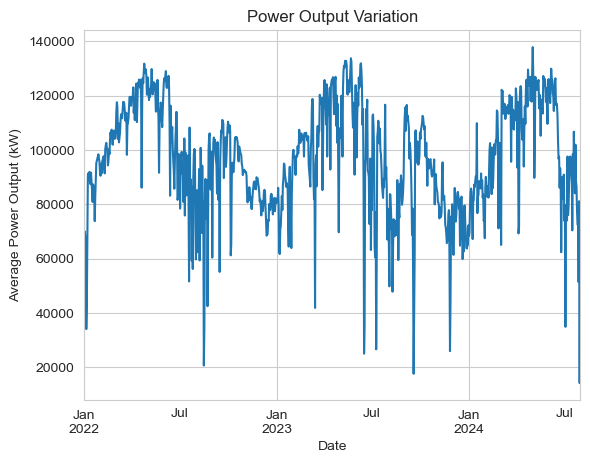

In [155]:
df['Power_Output_kW'].resample('D').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Power Output (kW)')
plt.title('Power Output Variation')

Text(0.5, 1.0, 'Cell Temperature Variation')

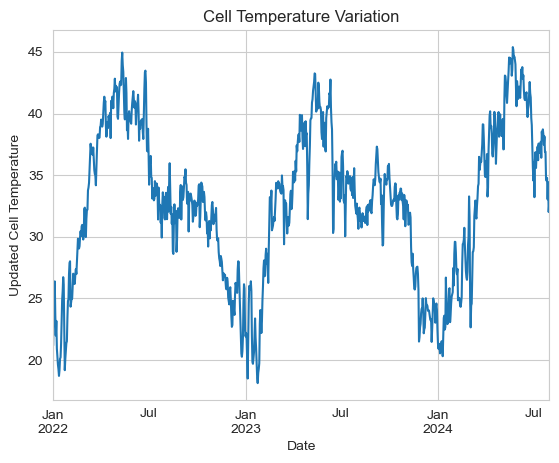

In [156]:
df['Updated_T_C'].resample('D').mean().plot()
plt.xlabel('Date')
plt.ylabel('Updated Cell Temperature')
plt.title('Cell Temperature Variation')

Text(0.5, 1.0, 'Solar Irradiance Variation')

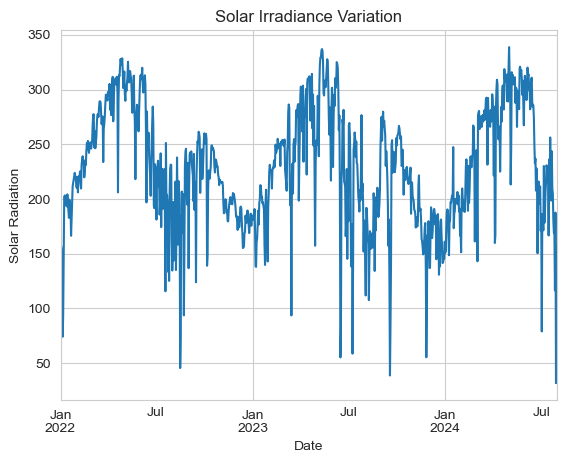

In [157]:
df['ALLSKY_SFC_SW_DWN'].resample('D').mean().plot()
plt.xlabel('Date')
plt.ylabel('Solar Radiation')
plt.title('Solar Irradiance Variation')

In [158]:
#Taking Data with Power Output > 0 only 
df = df[df["Power_Output_kW"] > 0]

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11810.0,2022.843692,0.768233,2022.000000,2022.000000,2023.000000,2023.000000,2024.000000
month,11810.0,5.973836,3.224894,1.000000,3.000000,6.000000,8.000000,12.000000
day,11810.0,15.709992,8.780650,1.000000,8.000000,16.000000,23.000000,31.000000
hour,11810.0,11.767485,3.658367,5.000000,9.000000,12.000000,15.000000,18.000000
ALLSKY_SFC_SW_DWN,11810.0,438.856135,293.020195,0.450000,166.455000,441.940000,682.545000,1067.050000
ALLSKY_SFC_PAR_TOT,11810.0,199.106246,132.947422,0.220000,75.932500,201.765000,309.495000,473.020000
T2M,11810.0,31.004085,6.798367,7.170000,27.162500,31.245000,35.260000,48.420000
WS10M,11810.0,4.039131,2.141396,0.010000,2.410000,3.710000,5.400000,17.620000
WD10M,11810.0,213.188493,91.751232,0.000000,178.800000,240.000000,270.900000,359.900000
Updated_T_C,11810.0,40.838542,11.405000,8.101676,32.400842,41.156575,49.057332,68.851236


In [159]:
# Display basic information and a preview of the newly taken part of dataset

df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_head, df_description

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11810 entries, 2022-01-01 07:00:00 to 2024-07-30 18:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                11810 non-null  int64  
 1   month               11810 non-null  int64  
 2   day                 11810 non-null  int64  
 3   hour                11810 non-null  int64  
 4   ALLSKY_SFC_SW_DWN   11810 non-null  float64
 5   ALLSKY_SFC_PAR_TOT  11810 non-null  float64
 6   T2M                 11810 non-null  float64
 7   WS10M               11810 non-null  float64
 8   WD10M               11810 non-null  float64
 9   Updated_T_C         11810 non-null  float64
 10  Power_Output_kW     11810 non-null  float64
 11  Month               11810 non-null  int32  
dtypes: float64(7), int32(1), int64(4)
memory usage: 1.1 MB


(                     year  month  day  hour  ALLSKY_SFC_SW_DWN  \
 Datetime                                                         
 2022-01-01 07:00:00  2022      1    1     7              38.03   
 2022-01-01 08:00:00  2022      1    1     8             176.10   
 2022-01-01 09:00:00  2022      1    1     9             308.73   
 2022-01-01 10:00:00  2022      1    1    10             447.35   
 2022-01-01 11:00:00  2022      1    1    11             543.20   
 
                      ALLSKY_SFC_PAR_TOT    T2M  WS10M  WD10M  Updated_T_C  \
 Datetime                                                                    
 2022-01-01 07:00:00               16.75  13.06   3.72   65.0    13.922330   
 2022-01-01 08:00:00               75.72  14.90   3.35   59.7    18.933791   
 2022-01-01 09:00:00              134.95  17.75   2.57   54.8    24.972352   
 2022-01-01 10:00:00              196.95  21.74   2.91   73.6    32.110132   
 2022-01-01 11:00:00              239.63  23.56   2.35   68.8

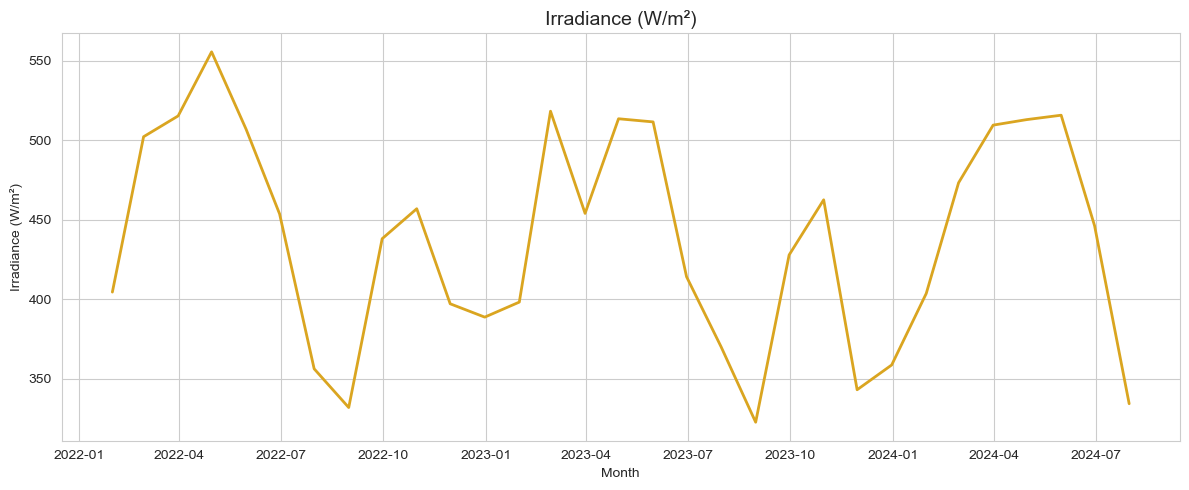

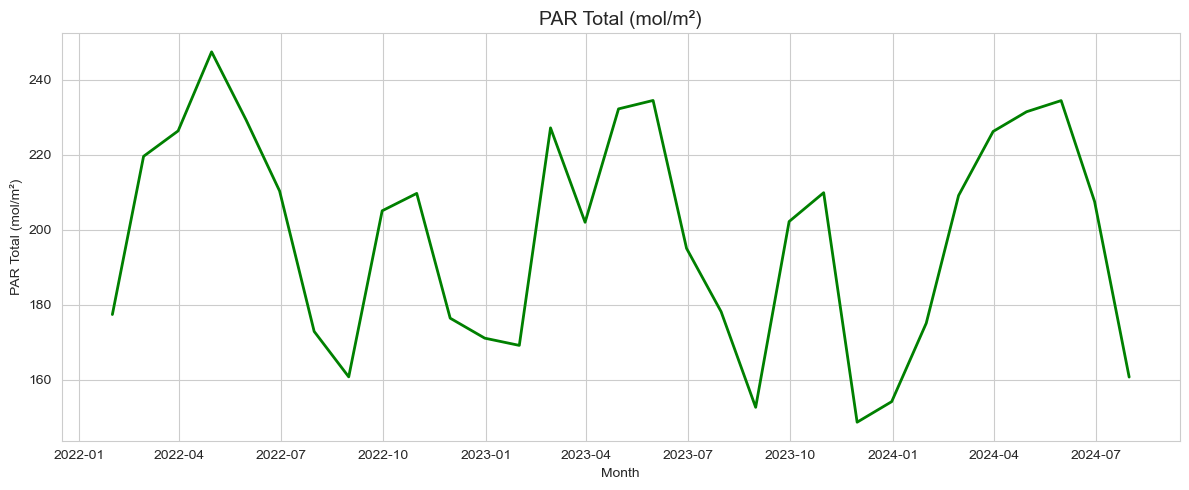

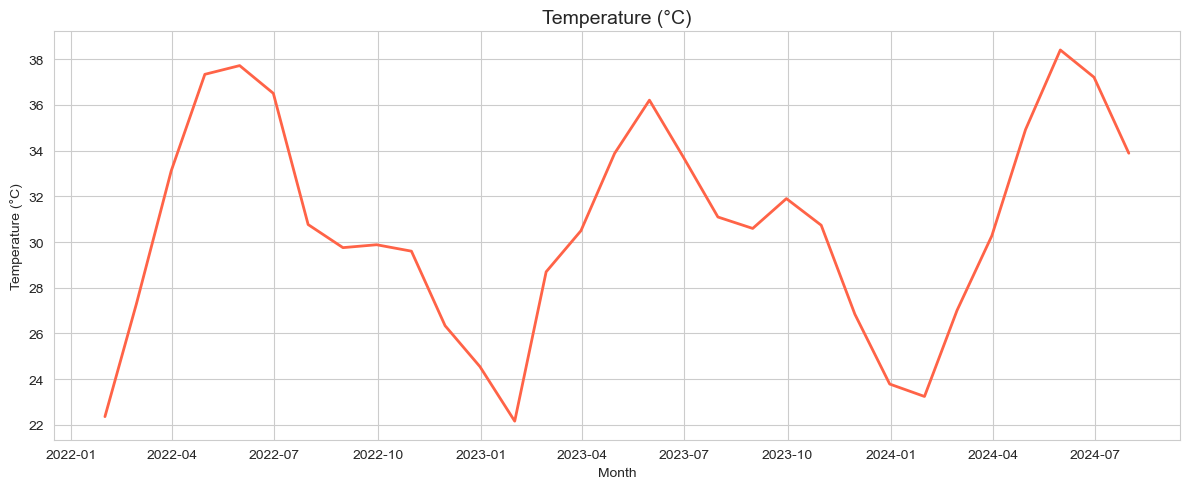

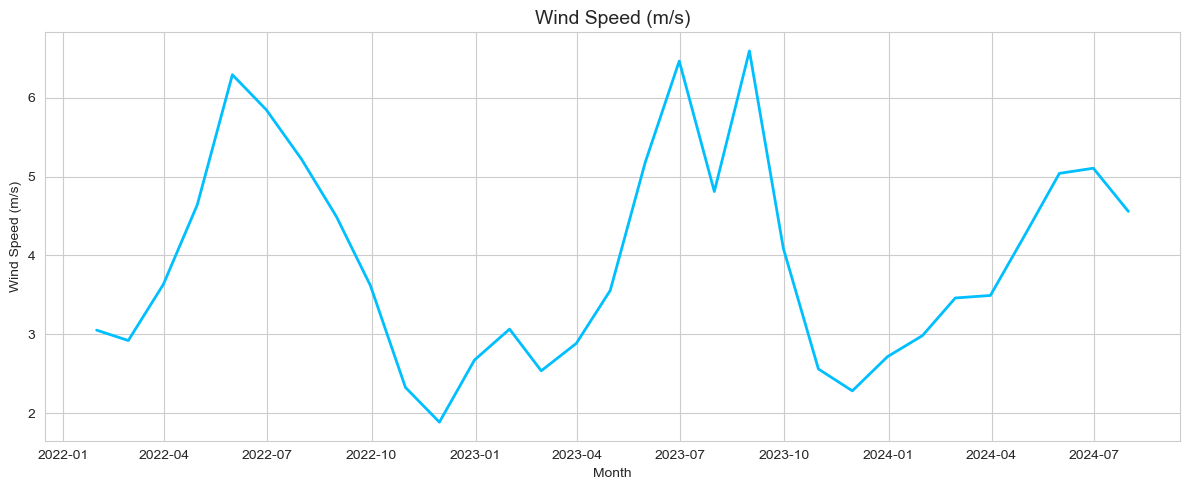

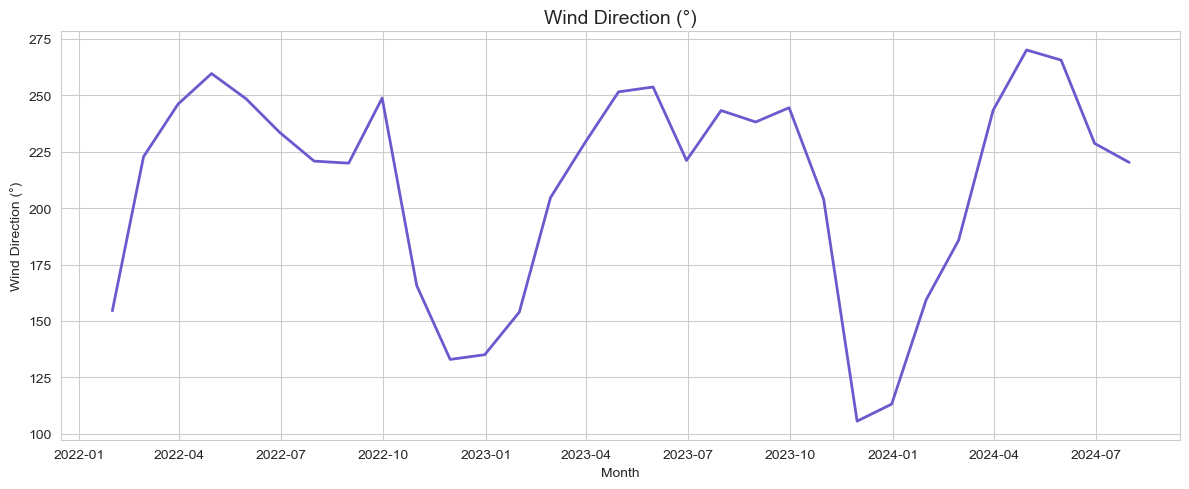

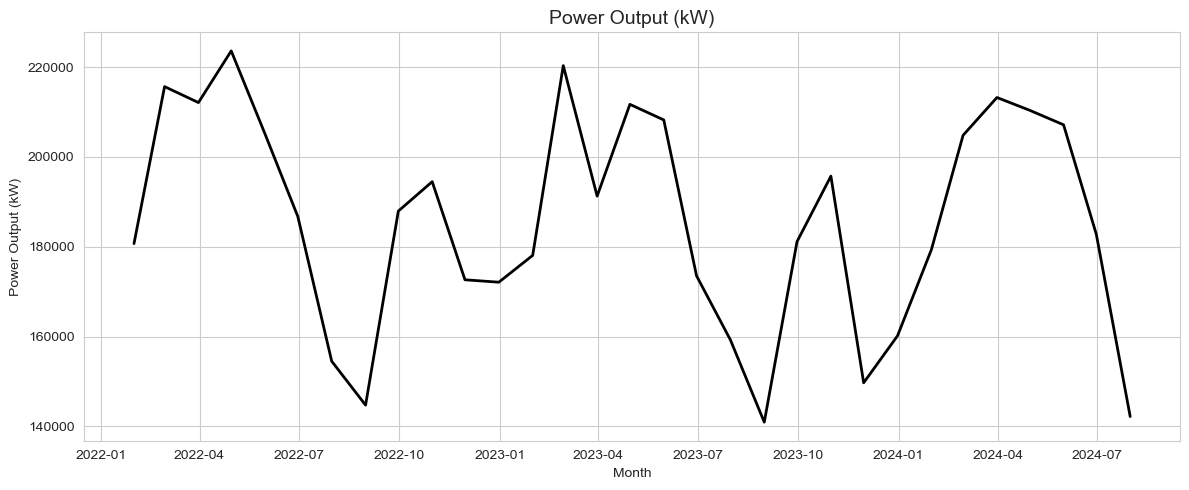

In [160]:
# Select relevant features to plot
features_to_plot = [
    'ALLSKY_SFC_SW_DWN',      # Irradiance
    'ALLSKY_SFC_PAR_TOT',     # PAR
    'T2M',                    # Temperature
    'WS10M',                  # Wind Speed
    'WD10M',                  # Wind Direction
    'Power_Output_kW'         # Output
]

# Compute monthly averages
monthly_df = df[features_to_plot].resample('M').mean()


# Plot settings
colors = ['goldenrod', 'green', 'tomato', 'deepskyblue', 'slateblue', 'black']
titles = [
    'Irradiance (W/m²)', 
    'PAR Total (mol/m²)', 
    'Temperature (°C)', 
    'Wind Speed (m/s)', 
    'Wind Direction (°)', 
    'Power Output (kW)'
]

# Generate individual plots
for feature, color, title in zip(features_to_plot, colors, titles):
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_df.index, monthly_df[feature], color=color, linewidth=2)
    plt.title(title, fontsize=14)
    plt.xlabel("Month")
    plt.ylabel(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

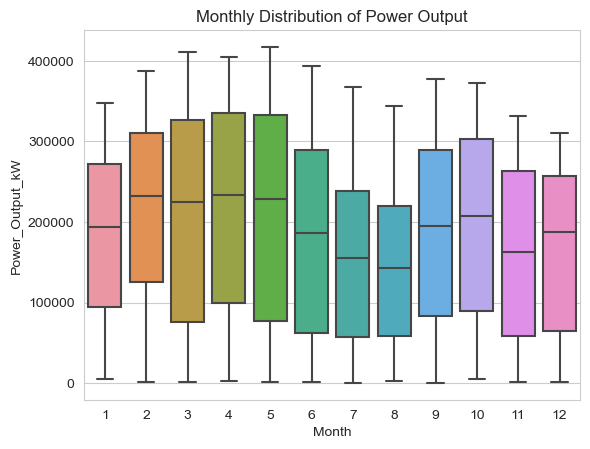

In [161]:
#Checking for Outliers now 
df["Month"] = df.index.month
sns.boxplot(x="Month", y="Power_Output_kW", data=df)
plt.title("Monthly Distribution of Power Output")
plt.show()

### Frequency Distribution of Power Output

This displays the frequency distribution of values in the DataFrame's 'Power_Output_kW' column, showing how often each unique numerical value appears in the dataset. The analysis reveals that the 'nat_demand' column contains a variety of numerical values, each with its own occurrence count. The output further shows there are 11810 distinct values in the 'Power_Output_kW' column. These findings offer important insights into the data's distribution and variability, helping to identify patterns and trends within the 'Power_Output_kW' measurements

In [165]:
df['Power_Output_kW'].value_counts()

Power_Output_kW
18966.701385     1
7769.189567      1
127980.007364    1
142041.874619    1
165129.836840    1
                ..
228096.851861    1
279239.936504    1
306879.079349    1
288512.187729    1
16278.668122     1
Name: count, Length: 11810, dtype: int64

### Outlier Detection and Handling  

#### Boxplot Analysis 

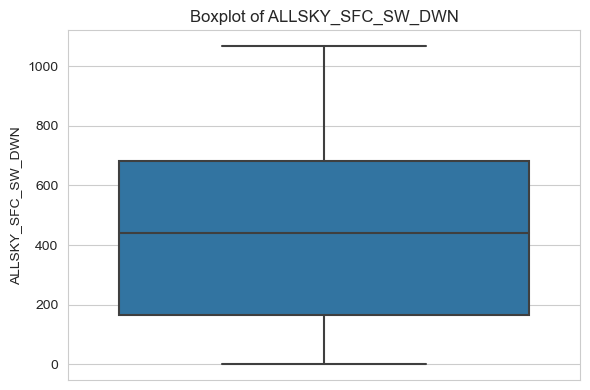

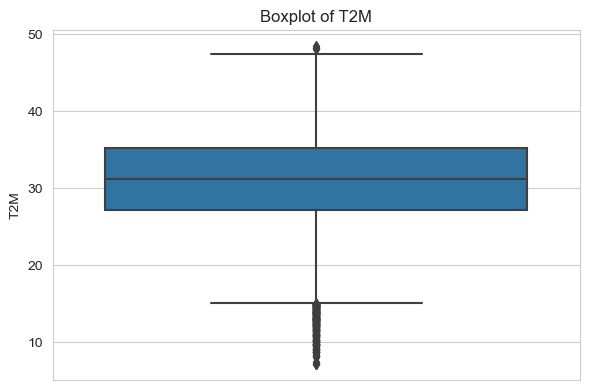

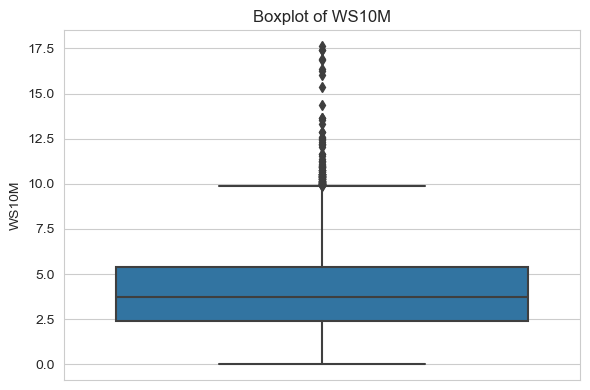

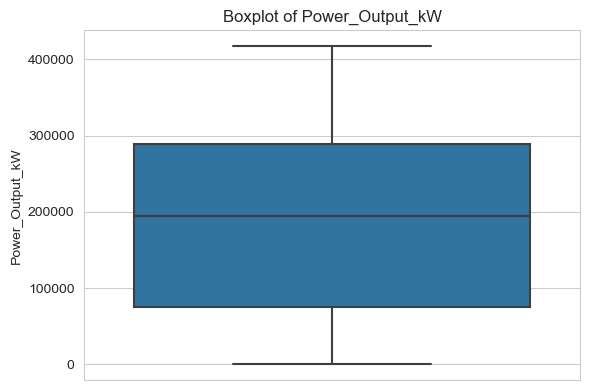

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['ALLSKY_SFC_SW_DWN', 'T2M', 'WS10M', 'Power_Output_kW']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

#### Z Score Method 

In [174]:
from scipy.stats import zscore

columns_to_check = ['ALLSKY_SFC_SW_DWN', 'T2M', 'WS10M', 'Power_Output_kW']
z_scores = df[columns_to_check].apply(zscore)
outliers = (abs(z_scores) > 3)
df_outliers = df[outliers.any(axis=1)]  # full rows
df_outliers_selected_zscore = df_outliers[columns_to_check]  # only selected columns
df_outliers_selected_zscore.head()

,ALLSKY_SFC_SW_DWN,T2M,WS10M,Power_Output_kW
Datetime,,,,
2022-01-10 07:00:00,65.90,9.95,2.93,33232.627152
2022-01-11 07:00:00,64.40,9.17,3.62,32599.526143
2022-01-12 07:00:00,54.67,8.90,3.31,27733.891134
2022-01-13 07:00:00,54.92,9.00,3.27,27847.344628
2022-01-14 07:00:00,62.58,9.37,2.99,31652.167226


In [175]:
df_outliers_selected_zscore.shape

(101, 4)

#### Inter Quartile Range Method (IQR) 

In [176]:
columns_to_check = ['ALLSKY_SFC_SW_DWN', 'T2M', 'WS10M', 'Power_Output_kW']
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df[columns_to_check] < (Q1 - 1.5 * IQR)) |
                (df[columns_to_check] > (Q3 + 1.5 * IQR)))

df_outliers = df[outlier_mask.any(axis=1)]
df_outliers_selected_IQR = df_outliers[columns_to_check]
df_outliers_selected_IQR.head()

,ALLSKY_SFC_SW_DWN,T2M,WS10M,Power_Output_kW
Datetime,,,,
2022-01-01 07:00:00,38.03,13.06,3.72,18966.701385
2022-01-01 08:00:00,176.10,14.90,3.35,85820.351508
2022-01-02 07:00:00,37.45,14.00,2.88,18596.866021
2022-01-08 07:00:00,61.60,10.83,2.74,30953.893936
2022-01-08 08:00:00,263.33,13.55,2.63,127872.047294


In [177]:
df_outliers_selected_IQR.shape

(357, 4)

In [178]:
df_cleaned = df[~outlier_mask.any(axis=1)]
print("Original data shape:", df.shape)
print("Cleaned data shape:", df_cleaned.shape)

Original data shape: (11810, 12)
Cleaned data shape: (11453, 12)


In [179]:
df = df[~outlier_mask.any(axis=1)]

In [191]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Further Plots and Visualisations for Better Understanding of Dataset and Problem Understanding 

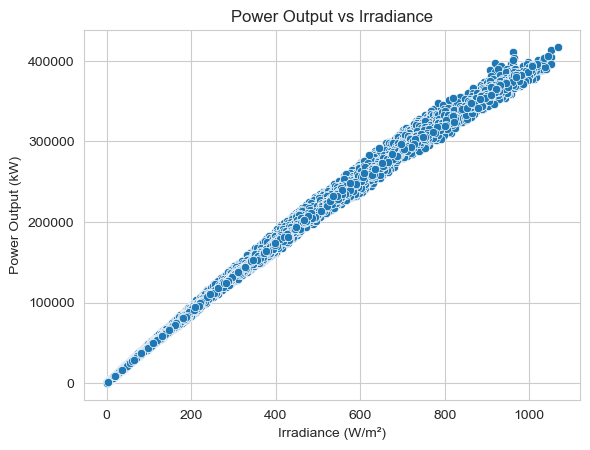

In [180]:
sns.scatterplot(x="ALLSKY_SFC_SW_DWN", y="Power_Output_kW", data=df)
plt.title("Power Output vs Irradiance")
plt.xlabel("Irradiance (W/m²)")
plt.ylabel("Power Output (kW)")
plt.show()

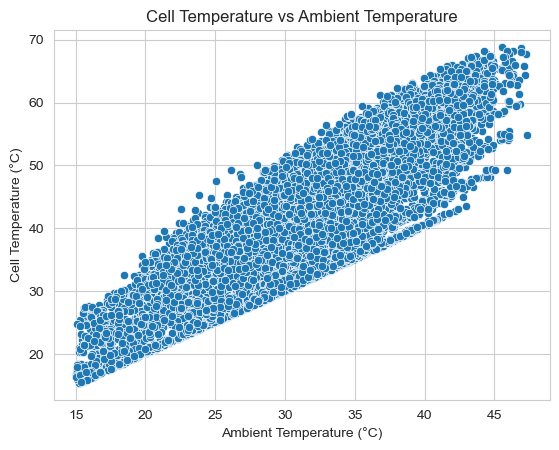

In [181]:
sns.scatterplot(x="T2M", y="Updated_T_C", data=df)
plt.title("Cell Temperature vs Ambient Temperature")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Cell Temperature (°C)")
plt.show()

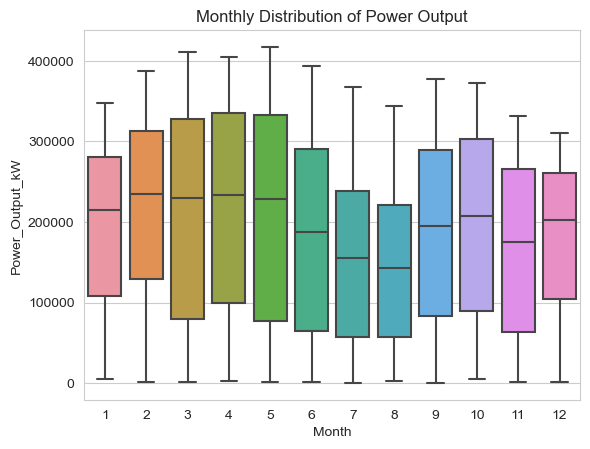

In [182]:
df["Month"] = df.index.month
sns.boxplot(x="Month", y="Power_Output_kW", data=df)
plt.title("Monthly Distribution of Power Output")
plt.show()

### Machine Learning Models Creation and Traing and Testing 

In [192]:
#Hybrid KNN + ANN ML Model 
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

class HybridKNN_ANN(BaseEstimator, RegressorMixin):
    def __init__(self, k=7, hidden_layer_sizes=(128, 64, 32), activation='relu', alpha=0.001):
        self.k = k
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.alpha = alpha
        self.knn = KNeighborsRegressor(n_neighbors=k)
        self.scaler = StandardScaler()
        self.ann = MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            alpha=alpha,
            max_iter=2000,
            random_state=42
        )

    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        knn_preds = self.knn.fit(X_scaled, y).predict(X_scaled).reshape(-1, 1)
        X_hybrid = np.hstack((X_scaled, knn_preds))
        self.ann.fit(X_hybrid, y)

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        knn_preds = self.knn.predict(X_scaled).reshape(-1, 1)
        X_hybrid = np.hstack((X_scaled, knn_preds))
        return self.ann.predict(X_hybrid)


In [194]:
#Hybrid Random Forest + ANN Model
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

class HybridRF_ANN(BaseEstimator, RegressorMixin):
    def __init__(self, rf_params=None, ann_params=None):
        self.rf_params = rf_params or {
            'n_estimators': 200,
            'max_depth': 20,
            'random_state': 42
        }
        self.ann_params = ann_params or {
            'hidden_layer_sizes': (128, 64, 32),
            'activation': 'relu',
            'alpha': 0.0005,
            'max_iter': 2000,
            'random_state': 42
        }
        self.scaler = StandardScaler()
        self.rf = RandomForestRegressor(**self.rf_params)
        self.ann = MLPRegressor(**self.ann_params)

    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        self.rf.fit(X_scaled, y)
        rf_preds = self.rf.predict(X_scaled).reshape(-1, 1)

        X_augmented = np.hstack((X_scaled, rf_preds))
        self.ann.fit(X_augmented, y)

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        rf_preds = self.rf.predict(X_scaled).reshape(-1, 1)
        X_augmented = np.hstack((X_scaled, rf_preds))
        return self.ann.predict(X_augmented)

### Implementation and Depiction of the Elbow Method to find optimum value of k for KNN Algorithm 

k = 1 → RMSE = 7002.7096
k = 2 → RMSE = 5937.2706
k = 3 → RMSE = 5663.8043
k = 4 → RMSE = 5436.0023
k = 5 → RMSE = 5359.2200
k = 6 → RMSE = 5287.8164
k = 7 → RMSE = 5302.0464
k = 8 → RMSE = 5298.4996
k = 9 → RMSE = 5304.8050
k = 10 → RMSE = 5300.6493
k = 11 → RMSE = 5324.3268
k = 12 → RMSE = 5340.6917
k = 13 → RMSE = 5354.2070
k = 14 → RMSE = 5369.5950
k = 15 → RMSE = 5392.0762
k = 16 → RMSE = 5406.3636
k = 17 → RMSE = 5434.4957
k = 18 → RMSE = 5519.1179
k = 19 → RMSE = 5553.4312
k = 20 → RMSE = 5579.6440


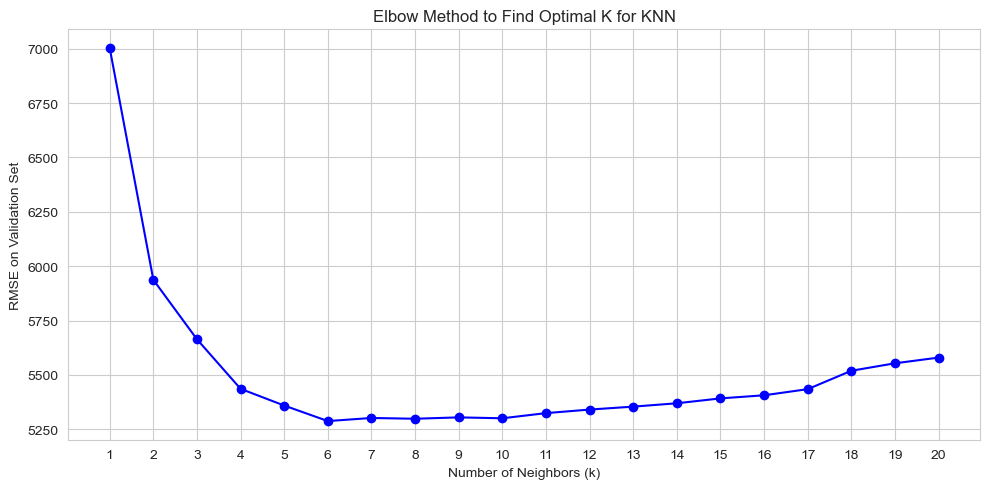

Best k based on lowest RMSE: 6


In [195]:
#Elbow method depiction to find optimum k for KNN to be implemented in Hybrid KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming HybridKNN_ANN is already defined

# Step 1: Split your data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Try different k values and calculate RMSE
k_values = list(range(1, 21))
errors = []

for k in k_values:
    model = HybridKNN_ANN(k=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)  # RMSE
    errors.append(rmse)
    print(f"k = {k} → RMSE = {rmse:.4f}")

# Step 3: Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, errors, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method to Find Optimal K for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE on Validation Set')
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

# Step 4: Find the best k
best_k = k_values[np.argmin(errors)]
print("Best k based on lowest RMSE:", best_k)

In [74]:
# ANN Model
mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    alpha=0.0005,
    learning_rate='adaptive',
    max_iter=3000,
    random_state=42
)

In [196]:
# Define all models including improved hybrid

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "HybridKNN_ANN": HybridKNN_ANN(k=6),
    "HybridRF_ANN": HybridRF_ANN()
}

In [197]:
import numpy as np
from sklearn.utils.validation import check_consistent_length

def safe_mape(y_true, y_pred, epsilon=1e-10):
    """
    Calculate MAPE safely with zero-division handling
    
    Parameters:
    y_true (array): Actual values
    y_pred (array): Predicted values
    epsilon (float): Small value to avoid division by zero
    
    Returns:
    float: MAPE value in percentage
    """
    check_consistent_length(y_true, y_pred)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Create mask to exclude zeros and near-zero values
    mask = np.abs(y_true) > epsilon
    
    if not np.any(mask):
        return np.nan  # Return NaN if all values are zeros
    
    # Calculate absolute percentage errors only for valid values
    ape = np.abs(y_true[mask] - y_pred[mask]) / np.abs(y_true[mask])
    
    return np.mean(ape) * 100  # Convert to percentage

### Metrics Value Calculations for different Models 

In [198]:
import time

# Train and evaluate all models with extended metrics
results = []
for name, model in models.items():
    start_time = time.time()
    
    if "Hybrid" in name:
        model.fit(X_train.values, y_train.values)
        y_pred = model.predict(X_test.values)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    end_time = time.time()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = safe_mape(y_test, y_pred) 
    medae = median_absolute_error(y_test, y_pred)
    maxerr = max_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    duration = end_time - start_time

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "Median AE": medae,
        "Max Error": maxerr,
        "R2": r2,
        "Explained Variance": evs,
        "Time (s)": duration
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.292e+11, tolerance: 2.867e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.315e+11, tolerance: 2.867e+10
  model = cd_fast.enet_coordinate_descent(


              Model          MAE           MSE         RMSE   MAPE (%)  \
7      HybridRF_ANN   333.645174  5.705273e+05   755.332563   0.474279   
4      DecisionTree   633.536072  1.851252e+06  1360.607382   0.852152   
5        KNeighbors  1315.507679  6.979890e+06  2641.948105   3.137452   
6     HybridKNN_ANN  3068.290416  2.796100e+07  5287.816369  13.252020   
2             Lasso  4994.467115  4.689844e+07  6848.243684   8.672236   
0  LinearRegression  4994.308128  4.690180e+07  6848.489217   8.671454   
1             Ridge  4994.307494  4.690181e+07  6848.489284   8.671450   
3        ElasticNet  4989.125577  4.690928e+07  6849.035161   8.639084   

     Median AE     Max Error        R2  Explained Variance   Time (s)  
7    14.051111   9868.986910  0.999964            0.999964  42.433927  
4    22.117682  17699.609431  0.999883            0.999883   0.234931  
5    83.891121  16769.150564  0.999558            0.999558   0.032255  
6  1175.985271  33083.819960  0.998228       

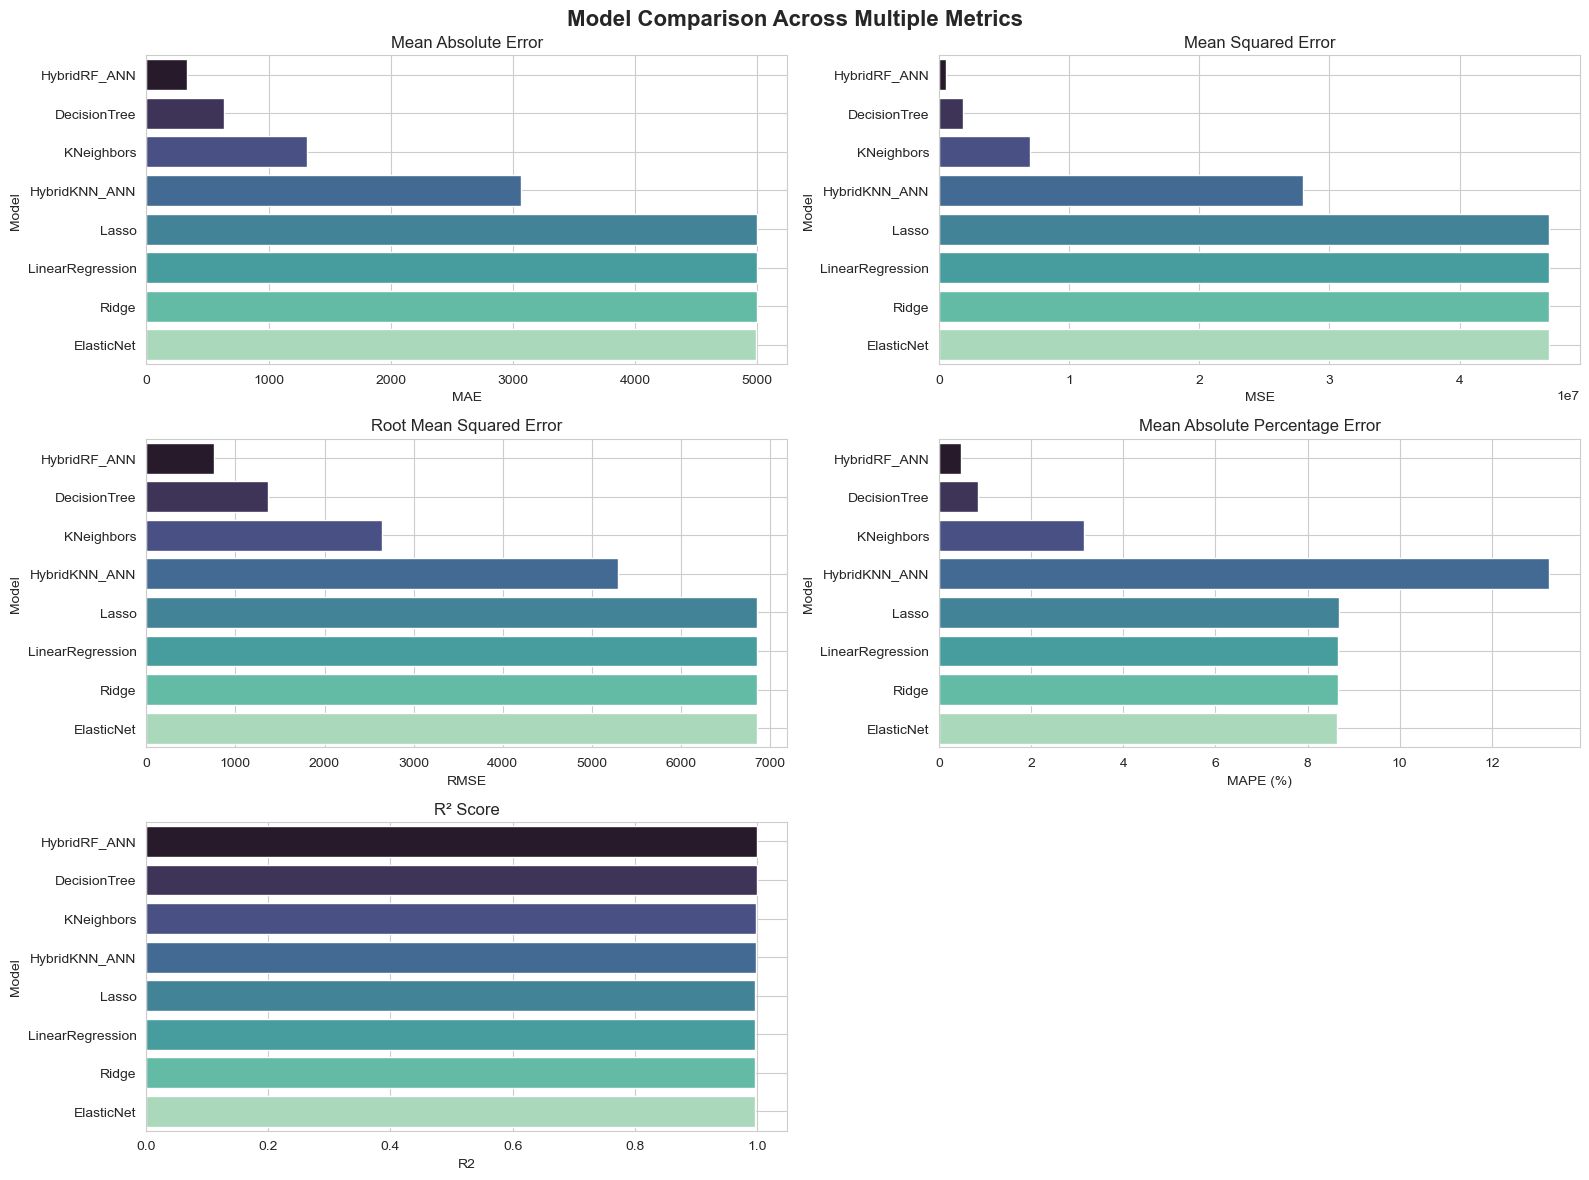

In [199]:
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE (%)', 'R2']
titles = ['Mean Absolute Error', 'Mean Squared Error', 
          'Root Mean Squared Error', 'Mean Absolute Percentage Error', 
          'R² Score']

plt.figure(figsize=(16, 12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns to fit 5 plots
    sns.barplot(x=metric, y="Model", data=results_df, palette="mako")  # Changed to more common palette
    plt.title(titles[i-1])
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.grid(True)

plt.suptitle("Model Comparison Across Multiple Metrics", 
             fontsize=16, fontweight='bold')
plt.tight_layout()  # Removed rect parameter unless you specifically need it
plt.show()

In [ ]:
#For non sunlight prediction that should be zero

if irradiance == 0 or hour < 6 or hour > 18:
    predicted_output = 0
else:
    predicted_output = model.predict(X)

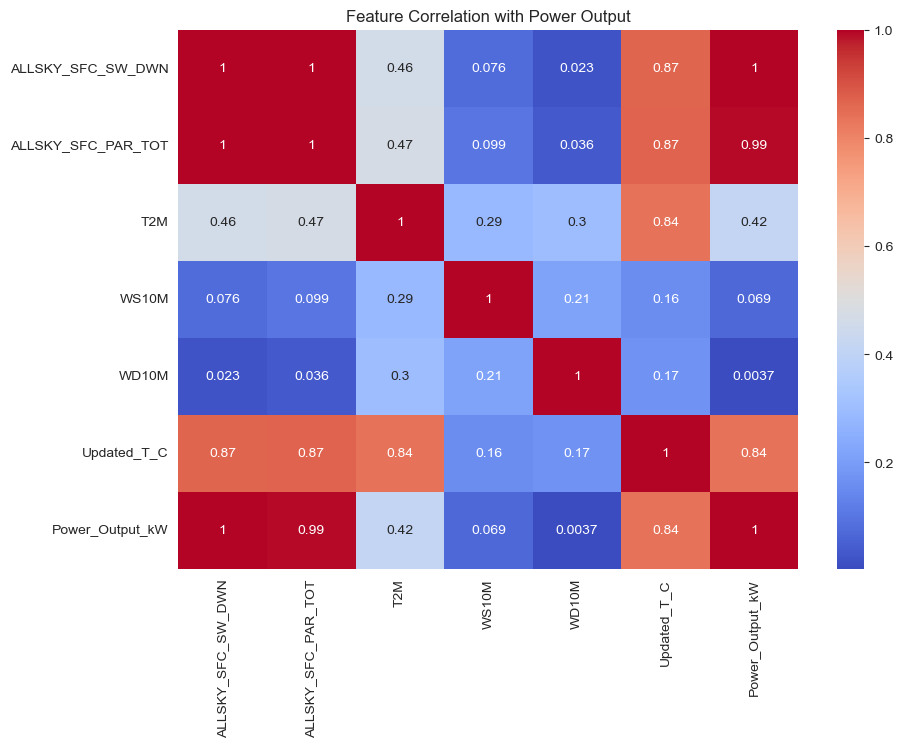

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    "ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_PAR_TOT", "T2M",
    "WS10M", "WD10M", "Updated_T_C", "Power_Output_kW"
]

corr = df[features].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Power Output")
plt.show()
